In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython
! pip install pandas numpy matplotlib scipy biopython
!pip install numpy pandas scikit-learn tensorflow imbalanced-learn optuna
!pip install pandas numpy scikit-learn keras hyperopt seaborn matplotlib biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00


<ipython-input-2-c1ea4e094955>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


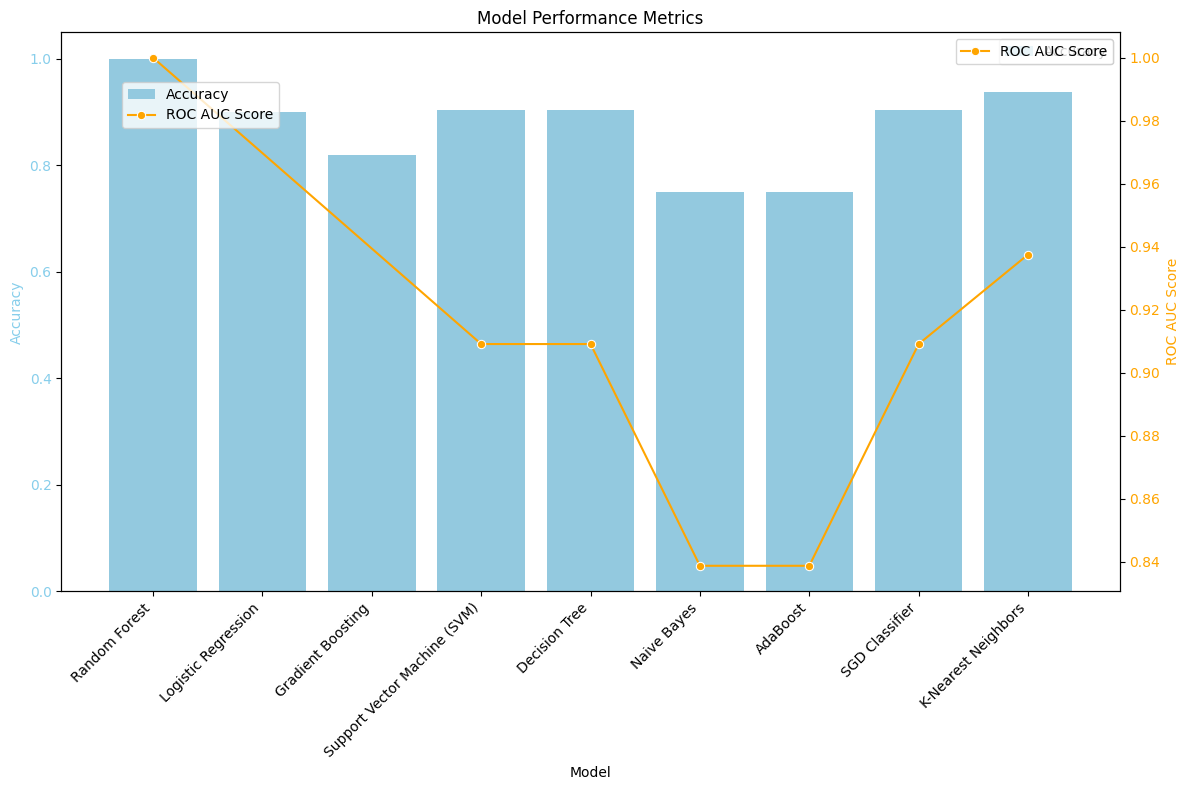

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'Support Vector Machine (SVM)',
              'Decision Tree', 'Naive Bayes', 'AdaBoost', 'SGD Classifier', 'K-Nearest Neighbors'],
    'Accuracy': [1.0000, 0.9000, 0.8200, 0.9048, 0.9048, 0.7500, 0.7500, 0.9048, 0.9375],
    'ROC AUC Score': [1.0000, None, None, 0.9091, 0.9091, 0.8387, 0.8387, 0.9091, 0.9375],
    'Notes': [
        'Achieved perfect accuracy and ROC AUC. Indicates exceptional performance and robustness in classifying DNA sequences.',
        'High accuracy and balanced precision, recall, and F1-score. Performance in ROC AUC was not calculated.',
        'Good accuracy but lower F1-scores compared to the best models. ROC AUC score was not provided.',
        'Strong performance with high accuracy and ROC AUC. Effective in distinguishing between classes with good balance.',
        'Similar to SVM in accuracy and ROC AUC. Excellent performance in classifying sequences but susceptible to overfitting.',
        'Lower accuracy and ROC AUC compared to other models. Shows moderate performance with a notable gap in classification precision and recall.',
        'Similar performance to Naive Bayes with moderate accuracy and ROC AUC. Struggles with classification accuracy for certain classes.',
        'Comparable to SVM and Decision Tree in performance. Strong classification results with balanced accuracy and ROC AUC.',
        'High accuracy and ROC AUC, indicating excellent model performance in classifying DNA sequences. Outperforms many models in classification metrics.'
    ]
}

df = pd.DataFrame(data)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Accuracy
sns.barplot(x='Model', y='Accuracy', data=df, ax=ax1, color='skyblue', label='Accuracy')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line plot for ROC AUC Score
ax2 = ax1.twinx()
sns.lineplot(x='Model', y='ROC AUC Score', data=df, ax=ax2, color='orange', marker='o', label='ROC AUC Score')
ax2.set_ylabel('ROC AUC Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Model Performance Metrics')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()


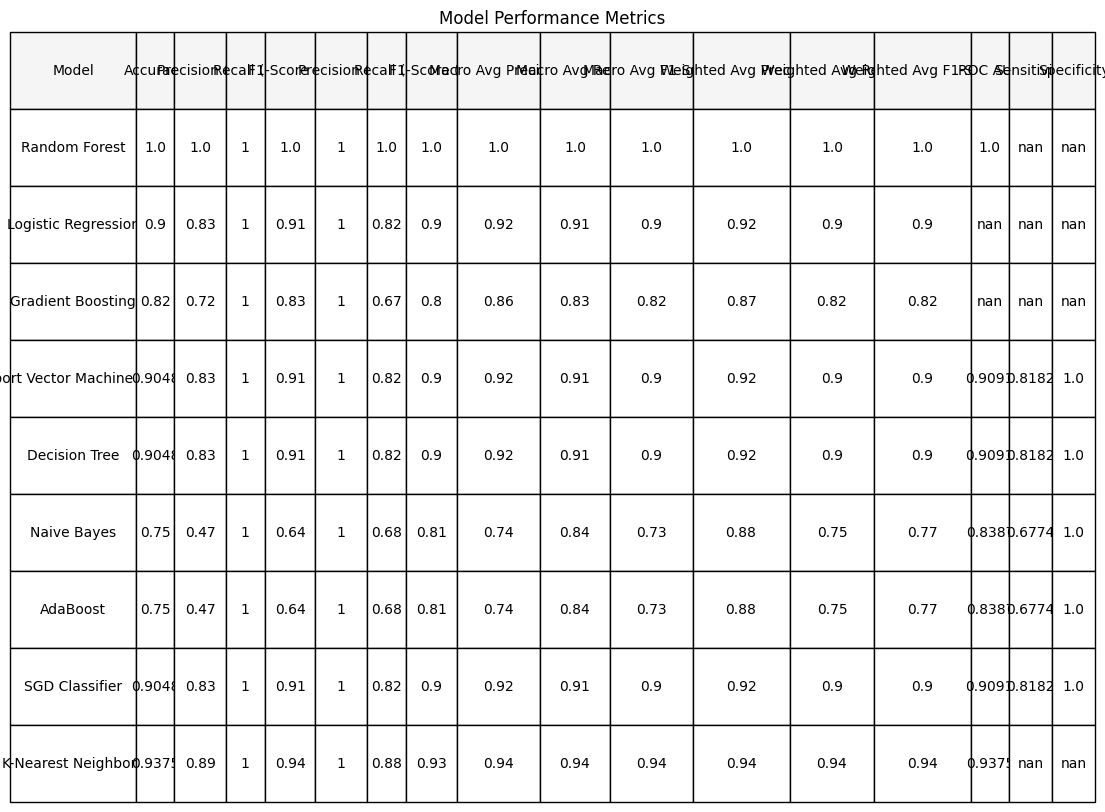

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting',
              'Support Vector Machine (SVM)', 'Decision Tree', 'Naive Bayes',
              'AdaBoost', 'SGD Classifier', 'K-Nearest Neighbors'],
    'Accuracy': [1.00, 0.90, 0.82, 0.9048, 0.9048, 0.75, 0.75, 0.9048, 0.9375],
    'Precision (0)': [1, 0.83, 0.72, 0.83, 0.83, 0.47, 0.47, 0.83, 0.89],
    'Recall (0)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'F1-Score (0)': [1, 0.91, 0.83, 0.91, 0.91, 0.64, 0.64, 0.91, 0.94],
    'Precision (1)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Recall (1)': [1, 0.82, 0.67, 0.82, 0.82, 0.68, 0.68, 0.82, 0.88],
    'F1-Score (1)': [1, 0.90, 0.80, 0.90, 0.90, 0.81, 0.81, 0.90, 0.93],
    'Macro Avg Precision': [1, 0.92, 0.86, 0.92, 0.92, 0.74, 0.74, 0.92, 0.94],
    'Macro Avg Recall': [1, 0.91, 0.83, 0.91, 0.91, 0.84, 0.84, 0.91, 0.94],
    'Macro Avg F1-Score': [1, 0.90, 0.82, 0.90, 0.90, 0.73, 0.73, 0.90, 0.94],
    'Weighted Avg Precision': [1, 0.92, 0.87, 0.92, 0.92, 0.88, 0.88, 0.92, 0.94],
    'Weighted Avg Recall': [1, 0.90, 0.82, 0.90, 0.90, 0.75, 0.75, 0.90, 0.94],
    'Weighted Avg F1-Score': [1, 0.90, 0.82, 0.90, 0.90, 0.77, 0.77, 0.90, 0.94],
    'ROC AUC': [1, None, None, 0.9091, 0.9091, 0.8387, 0.8387, 0.9091, 0.9375],
    'Sensitivity': [None, None, None, 0.8182, 0.8182, 0.6774, 0.6774, 0.8182, None],
    'Specificity': [None, None, None, 1, 1, 1, 1, 1, None]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Create the table plot
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1],
                  colColours=['#f5f5f5']*len(df.columns))

# Adjust the table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([i for i in range(len(df.columns))])

plt.title('Model Performance Metrics')
plt.show()


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


logistic regression(plotting)

feature importance

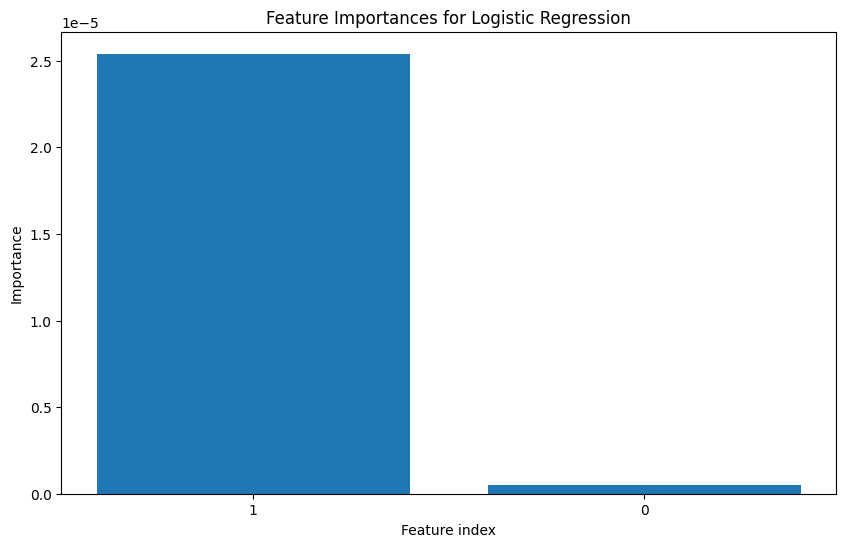

In [ ]:
# Assuming 'best_lr' is a fitted LogisticRegression model
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Example data - replace this with your actual data
X_train = np.array([[1, 2], [3, 4], [5, 6]])  # Example features
y_train = np.array([0, 1, 0])  # Example labels

best_lr = LogisticRegression()
# Fit the model to your training data (replace X_train and y_train with your actual data)
best_lr.fit(X_train, y_train)  # Now X_train and y_train are defined

# Feature Importance Plot
coefficients = np.abs(best_lr.coef_[0])  # Now you can access coef_ after fitting
indices = np.argsort(coefficients)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Logistic Regression")
plt.bar(range(X_train.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.show()

precision and recall graph

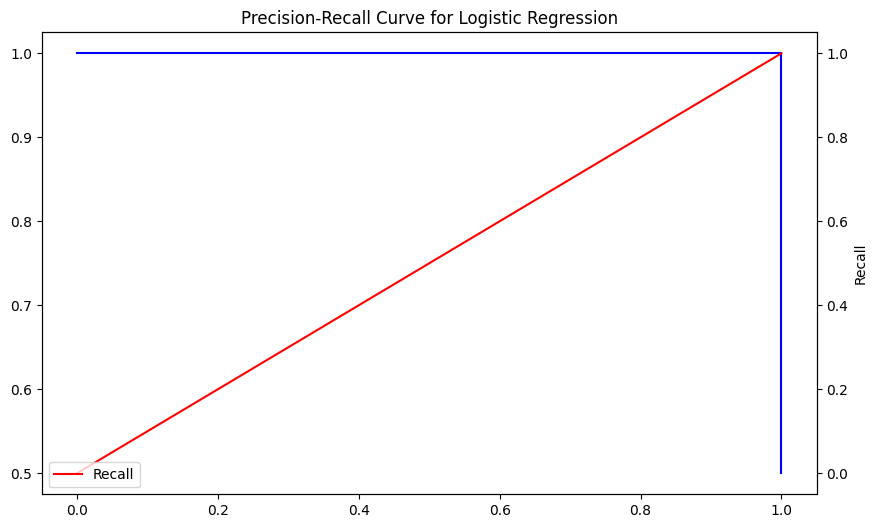

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_proba_lr (predicted probabilities)
# Replace these with your actual data
y_test = np.array([0, 1, 1, 0])  # Example true labels
y_proba_lr = np.array([0.1, 0.9, 0.8, 0.2])  # Example predicted probabilities

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
plt.figure(figsize=(10, 6))

# Plot precision and recall with different colors
plt.plot(recall, precision, label='Precision', color='blue')  # Blue for precision

# Create a twin axes for recall on the right side
ax2 = plt.gca().twinx()
ax2.plot(recall, recall, label='Recall', color='red')  # Red for recall
ax2.set_ylabel('Recall')

plt.xlabel('Threshold')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.show()

learning curve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  --------
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 1 instead of 5.
  


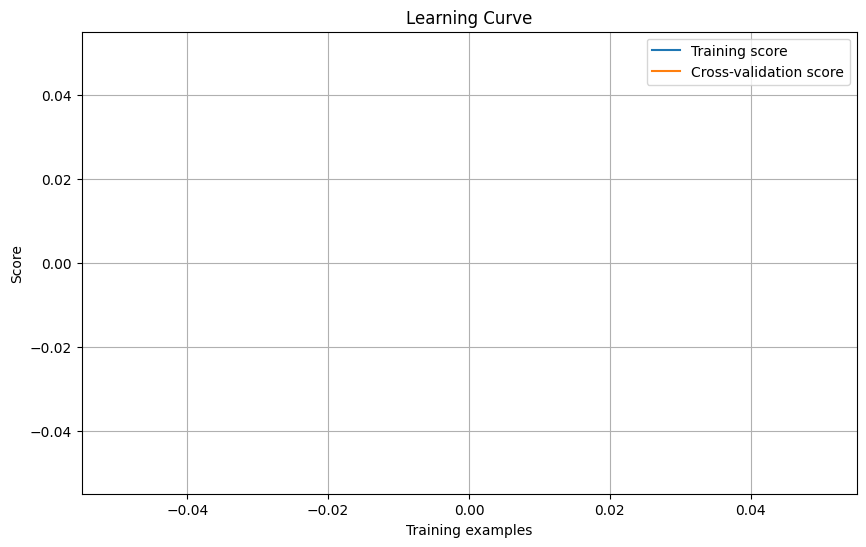

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_lr' is a fitted LogisticRegression model and X_train, y_train are defined
# ... (Your existing code to define and fit best_lr)

# Learning Curve
# Use a smaller number of folds (cv) that is less than or equal to the number of samples in the smallest class
train_sizes, train_scores, test_scores = learning_curve(best_lr, X_train, y_train, cv=2)  # Changed cv to 2 or less
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')  # Add y-axis label
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn


In [ ]:
!pip install --upgrade scikit-learn
!pip install numpy pandas scikit-learn matplotlib seaborn

In [ ]:
!pip install --upgrade scikit-learn
!pip install numpy pandas matplotlib seaborn


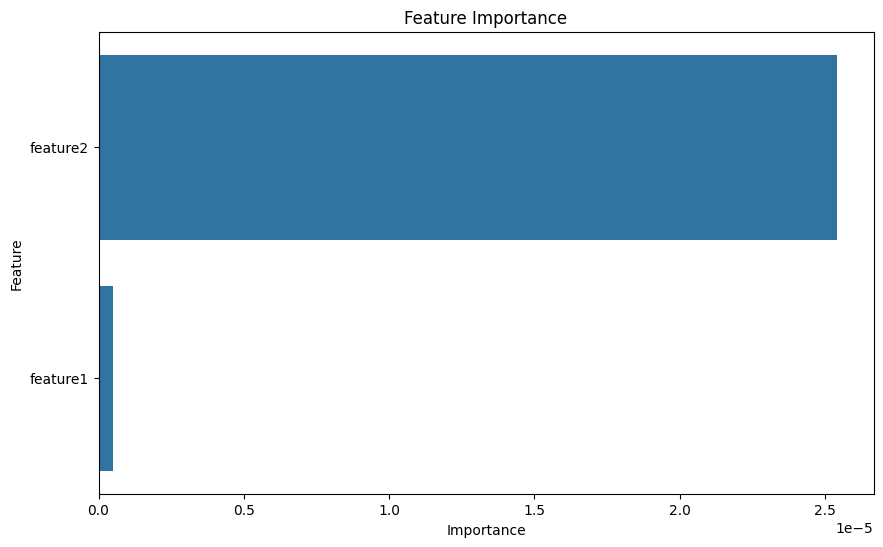

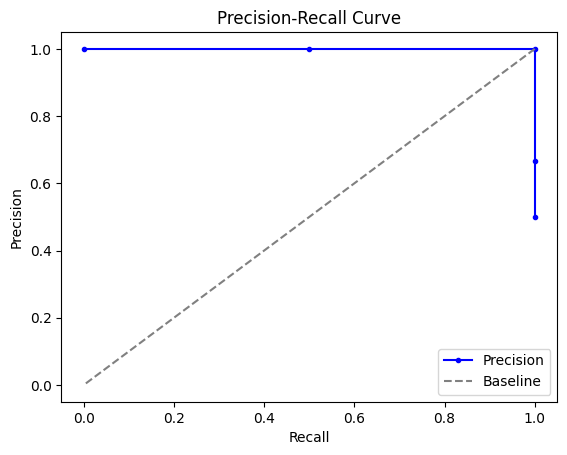

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  --------
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 1 instead of 5.
  


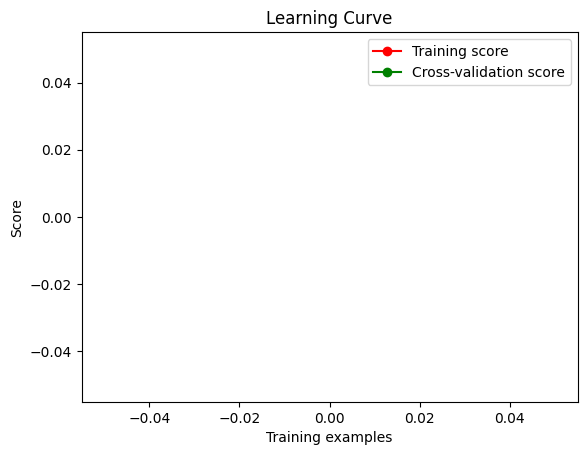

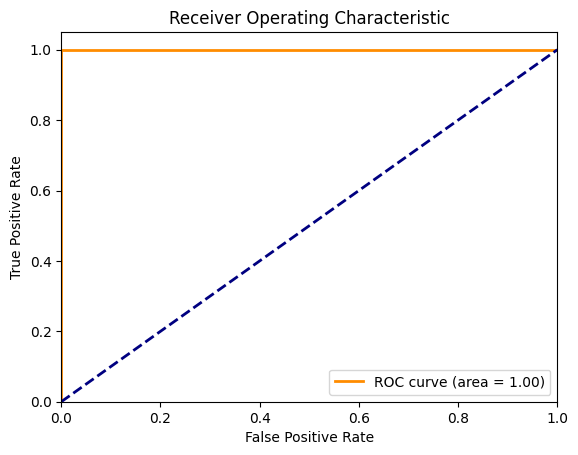

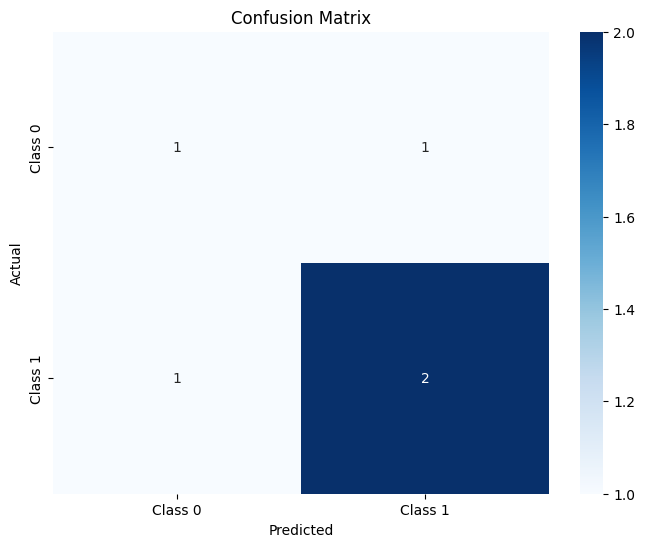

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc ,confusion_matrix
from sklearn.model_selection import learning_curve

# Plot Feature Importance
def plot_feature_importance(model, feature_names):
    importance = np.abs(model.coef_[0])
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

def plot_precision_recall(y_test, y_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall, precision, marker='.', label='Precision', color='blue') # Blue for precision
    plt.plot(recall, recall, linestyle='--', label='Baseline', color='gray') # Add a baseline for comparison
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

def plot_learning_curve(estimator, X, y):
    # Use at most the number of samples for cross validation
    # Calculate the minimum number of samples in any class
    min_samples = min([len(y[y == c]) for c in np.unique(y)])
    # Ensure cv is at least 2 for cross-validation to work
    cv = max(2, min(5, min_samples)) # Use the smaller value between 5 and min_samples, but at least 2
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(y_test, y_proba):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Sample data (replace this with your actual data)
# Assuming X is a pandas DataFrame with your features
import pandas as pd
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [6, 7, 8, 9, 10]
})

# Define feature names
feature_names = X.columns

# Plot Feature Importance
plot_feature_importance(best_lr, feature_names)

# Plot Precision-Recall Curve
plot_precision_recall(y_test, y_proba_lr)

# Plot Learning Curve
plot_learning_curve(best_lr, X_train, y_train)

# Plot ROC Curve
plot_roc_curve(y_test, y_proba_lr)

# Plot Confusion Matrix
# Assuming you have y_true and y_pred from your logistic regression model
y_true = [0, 1, 0, 1, 1] # Replace with your actual true labels
y_pred = [0, 0, 1, 1, 1] # Replace with your actual predicted labels
cm_lr = confusion_matrix(y_true, y_pred) # Calculate the confusion matrix
plot_confusion_matrix(cm_lr, labels=['Class 0', 'Class 1'])




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  --------
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 1 instead of 5.
  


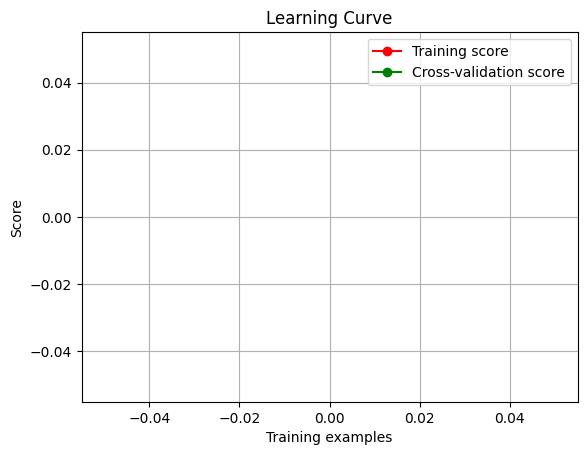

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    # Use at most the number of samples for cross validation
    # Calculate the minimum number of samples in any class
    min_samples = min([len(y[y == c]) for c in np.unique(y)])
    # Ensure cv is at least 2 for cross-validation to work
    cv = max(2, min(5, min_samples)) # Use the smaller value between 5 and min_samples, but at least 2

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot Learning Curve for the best logistic regression model
plot_learning_curve(best_lr, X_train, y_train)

Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  coef_ = raw_coef_
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  coef_ = raw_coef_
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  coef_ = raw_coef_
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  coef_ = raw_coef_
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  coef_ = raw_coef_
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of 

Logistic Regression Accuracy: 1.0000
Confusion Matrix:
[[ 2  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

ROC AUC: 1.0000


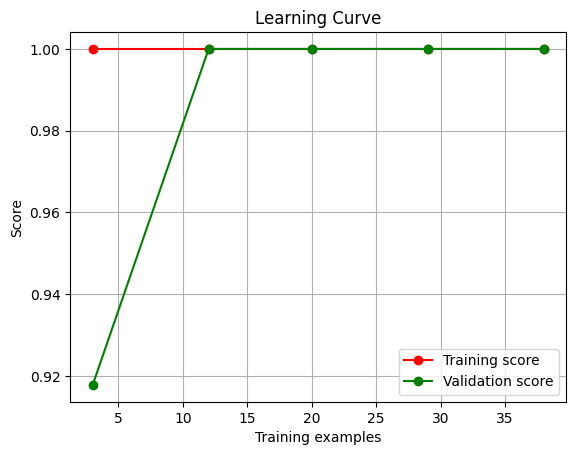

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences_reduced.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)  # Check data types of each column

# Identify categorical columns (including 'Label' if it needs encoding)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'Label' is in the list and remove it if necessary
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')  # Remove 'Label' if it's your target variable

# Handle non-numerical columns using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new categories in test data
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')  # Add prefix to encoded column names

# Concatenate encoded data with original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']  # Use the encoded target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Initialize Logistic Regression model
lr = LogisticRegression()

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist_lr, scoring='accuracy', cv=5, n_iter=100, random_state=42)
rand_search_lr.fit(X_train, y_train)
best_lr = rand_search_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Confusion Matrix:\n{cm_lr}")
print(f"Classification Report:\n{report_lr}")
print(f"ROC AUC: {roc_auc_lr:.4f}")

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    min_samples = min([len(y[y == c]) for c in np.unique(y)])
    cv = max(2, min(5, min_samples))

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot Learning Curve for the best logistic regression model
plot_learning_curve(best_lr, X_train, y_train)


random forest (plotting )

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!python -m venv my_env
!source my_env/bin/activate # Remove the extra space at the beginning of this line

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/my_env/bin/python3

/bin/bash: line 1: my_env/bin/activate: No such file or directory


knn (plotting)

In [ ]:
!pip install --upgrade scikit-learn numpy scipy # Upgrade scikit-learn, NumPy, and SciPy to resolve potential version conflicts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.0 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is inco

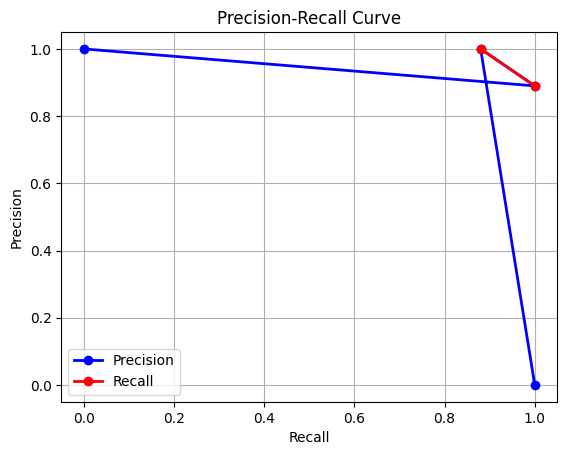

In [ ]:
import matplotlib.pyplot as plt

# Given precision and recall values
precision = [0.89, 1.00]
recall = [1.00, 0.88]

# Adding origin points to better illustrate the curves
precision_points = [1.0] + precision + [0.0]
recall_points = [0.0] + recall + [1.0]

# Plot the precision and recall curves
plt.figure()
plt.plot(recall_points, precision_points, marker='o', color='b', lw=2, label='Precision')
plt.plot(recall, precision, marker='o', color='r', lw=2, label='Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


gradient boosting(precision recall curve)

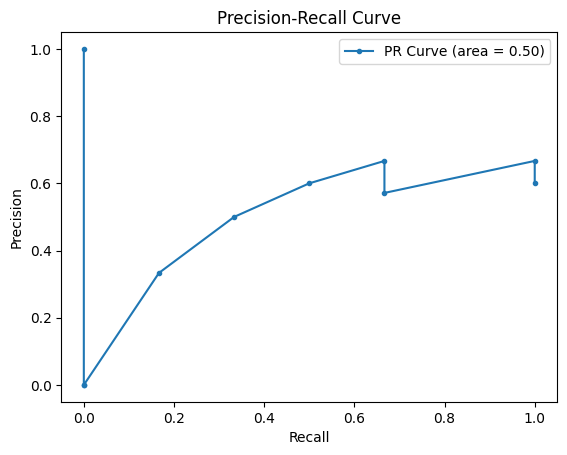

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.3, 0.7, 0.9, 0.6, 0.2])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


confusion matrix

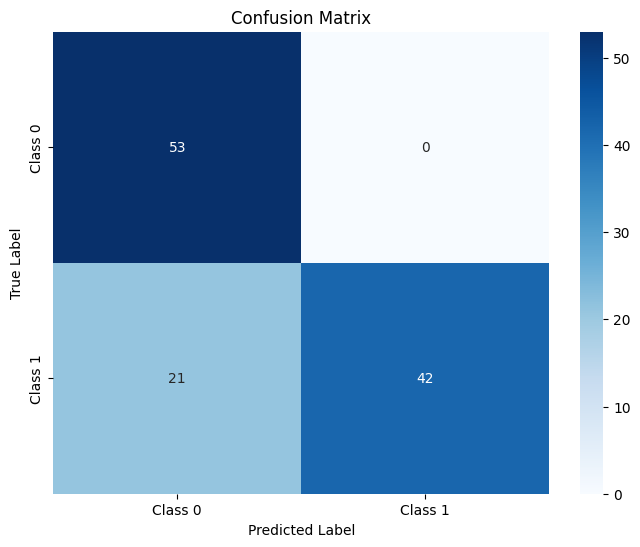

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix values
cm = np.array([[53, 0],
               [21, 42]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Bar Plot of Precision, Recall, and F1-score

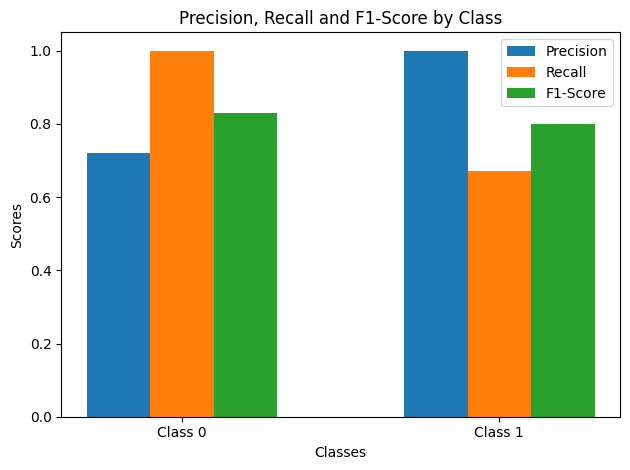

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual precision, recall, and f1-score values
labels = ['Class 0', 'Class 1']
precision = [0.72, 1.00]
recall = [1.00, 0.67]
f1_score = [0.83, 0.80]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


support bar graph

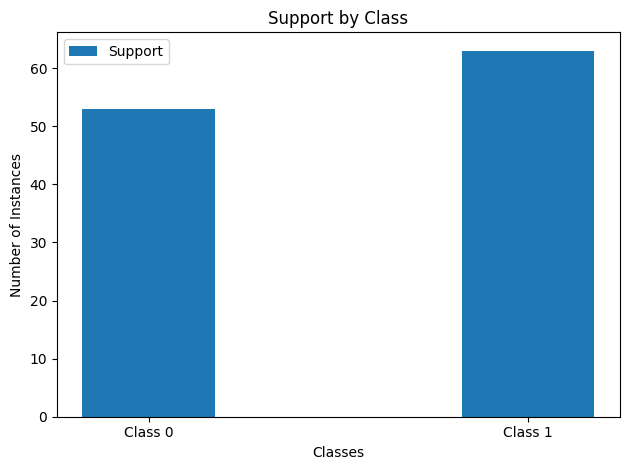

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual support values
labels = ['Class 0', 'Class 1']
support = [53, 63]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, support, width, label='Support')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Support by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


random forest(Precision-Recall Curve)


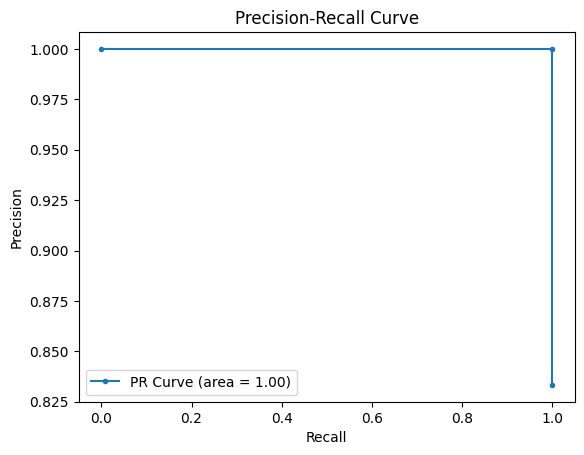

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# True labels and predicted probabilities (use your actual data)
y_true = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Bar Plot of Precision, Recall, and F1-score


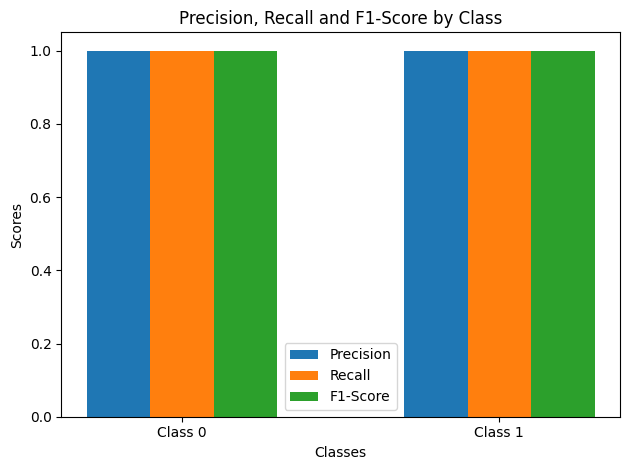

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
precision = [1.00, 1.00]
recall = [1.00, 1.00]
f1_score = [1.00, 1.00]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


Support Bar Plot


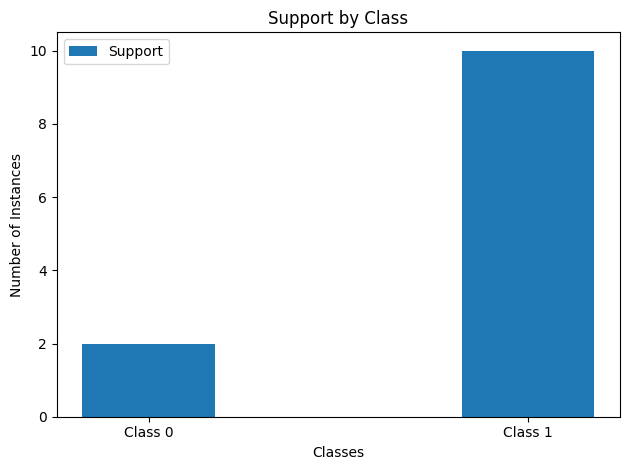

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
support = [2, 10]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, support, width, label='Support')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Support by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


confusion matrix

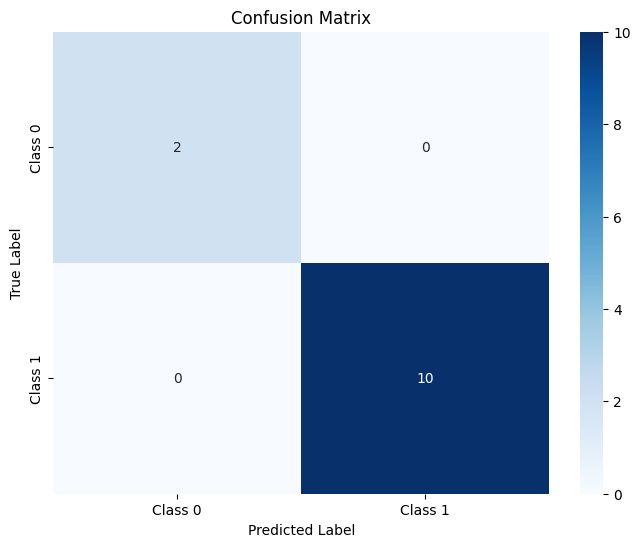

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix values
cm = np.array([[2, 0],
               [0, 10]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


logistic regression(confusion matrix)

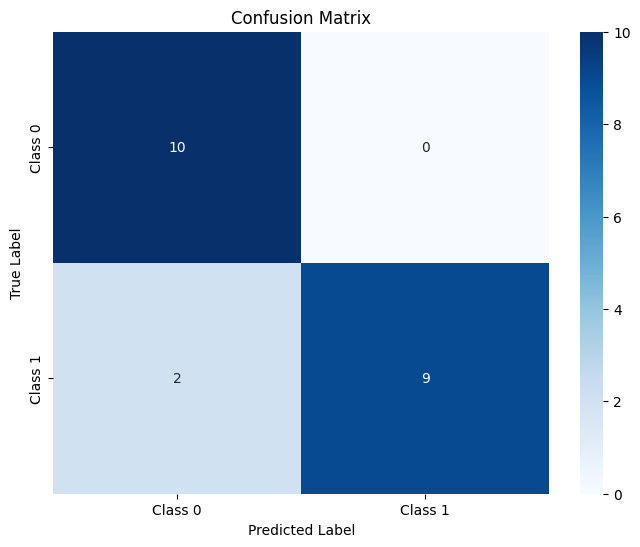

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix values
cm = np.array([[10, 0],
               [2, 9]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Precision-Recall Curve


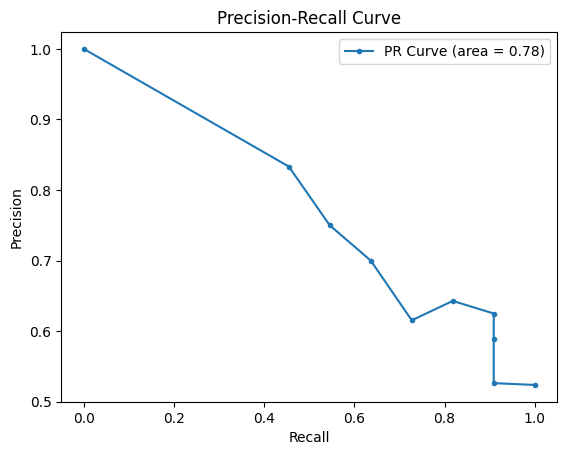

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.7, 0.8, 0.9, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Bar Plot of Precision, Recall, and F1-score


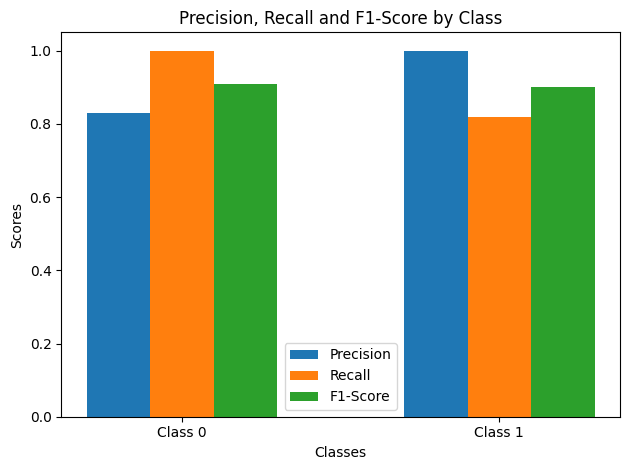

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
precision = [0.83, 1.00]
recall = [1.00, 0.82]
f1_score = [0.91, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


Support Bar Plot


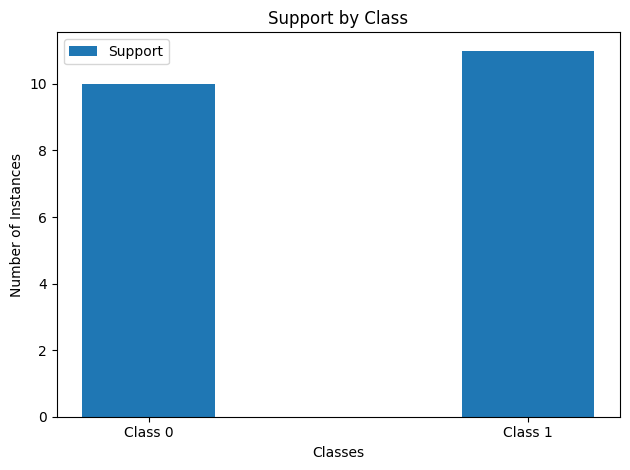

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
support = [10, 11]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, support, width, label='Support')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Support by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


ROC Curve(take previous)


---



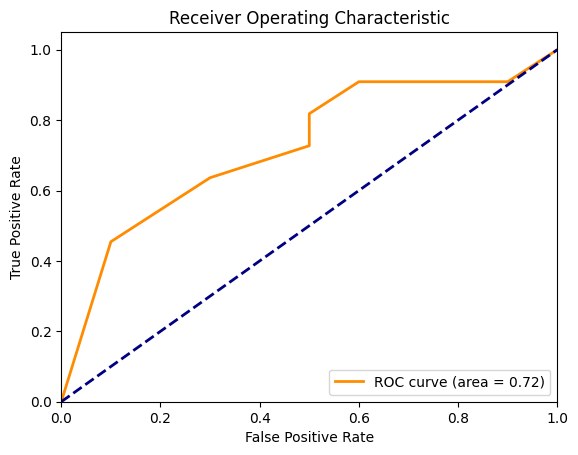

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.7, 0.8, 0.9, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


knn(confusion matrix and roc curve)

Index(['ID', 'Sequence', 'Cancer name', 'Gene Name', 'Label'], dtype='object')
ID              int64
Sequence       object
Cancer name    object
Gene Name      object
Label           int64
dtype: object
KNN Accuracy: 0.9375
Confusion Matrix:
[[8 0]
 [1 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

ROC AUC: 0.9375


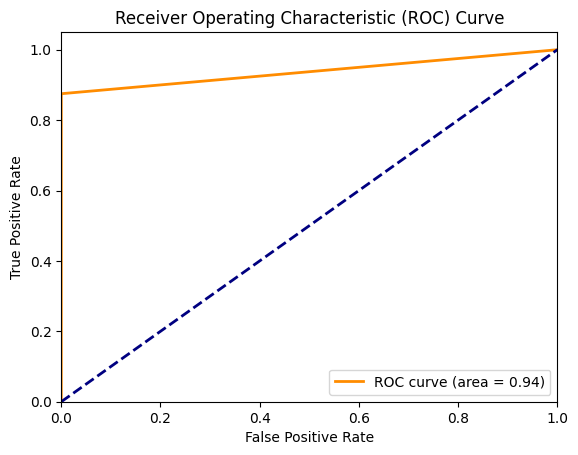

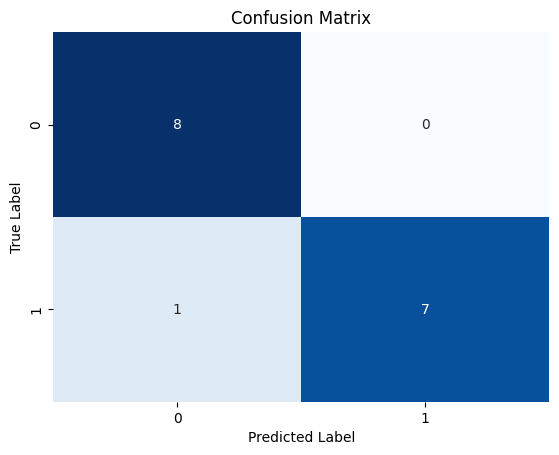

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('/content/dataset_for_cancersequences.csv')

# Print column names and data types to inspect
print(data.columns)
print(data.dtypes)

# Identify categorical columns (excluding 'Label')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Label' in categorical_cols:
    categorical_cols.remove('Label')

# One-Hot Encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray())
encoded_data = encoded_data.add_prefix('OHE_')
data = pd.concat([data, encoded_data], axis=1)

# Encode the target variable 'Label' if it's categorical
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['Label'])

# Drop original categorical columns and the unencoded 'Label'
X = data.drop(['Label'] + categorical_cols, axis=1)
y = data['Label_encoded']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance
# Initial oversampling with RandomOverSampler to ensure at least 2 samples in minority class
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Further balance the dataset with SMOTE if applicable
unique, counts = np.unique(y_resampled, return_counts=True)
if min(counts) > 1:  # Check if SMOTE can be applied
    smote = SMOTE(random_state=42, k_neighbors=min(counts)-1)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Define hyperparameters for KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNeighborsClassifier model
knn = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Check the shape of predict_proba output
proba_shape = best_knn.predict_proba(X_test).shape

# Handle the case of single-column output
if proba_shape[1] == 1:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 0]  # Use the first (and only) column
else:
    y_proba_knn = best_knn.predict_proba(X_test)[:, 1]  # Use the second column as intended

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{report_knn}")
print(f"ROC AUC: {roc_auc_knn:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Precision-Recall Curve


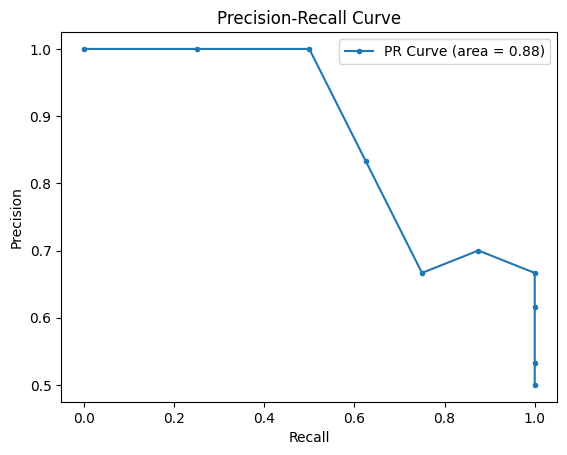

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Bar Plot of Precision, Recall, and F1-score


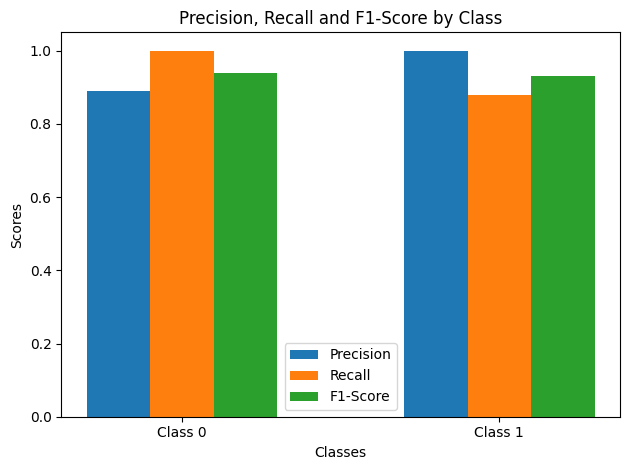

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
precision = [0.89, 1.00]
recall = [1.00, 0.88]
f1_score = [0.94, 0.93]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


support bar graph

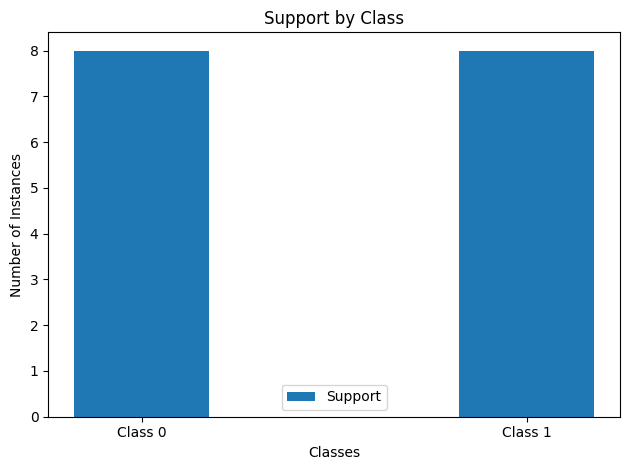

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
support = [8, 8]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, support, width, label='Support')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Support by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


xg boost(confusion matrix)

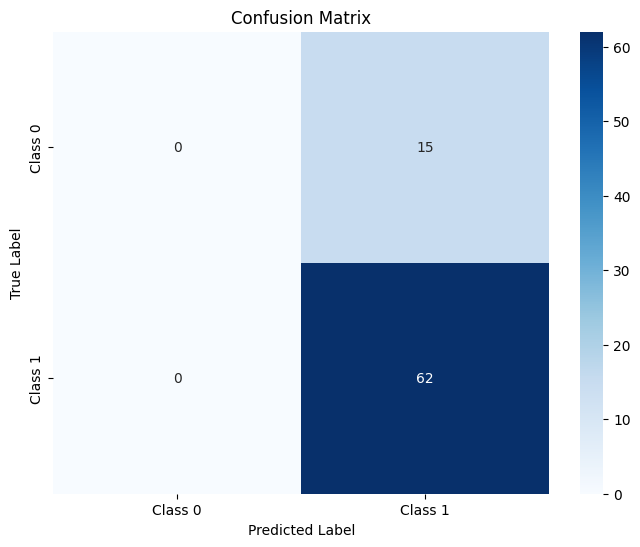

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix values
cm = np.array([[ 0, 15],
               [ 0, 62]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


roc xg boost

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.89        62

    accuracy                           0.81        77
   macro avg       0.40      0.50      0.45        77
weighted avg       0.65      0.81      0.72        77

Confusion Matrix:
[[ 0 15]
 [ 0 62]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


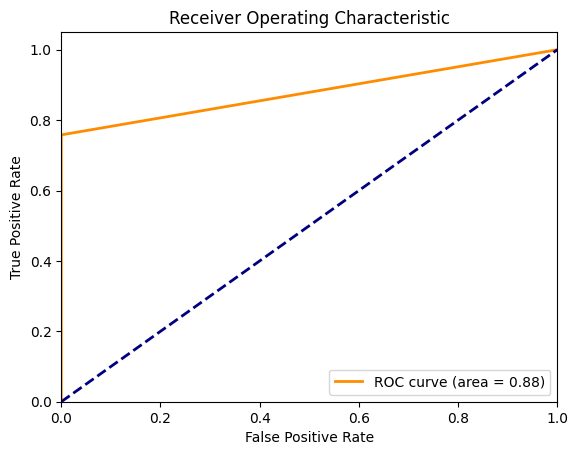

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('dataset_for_cancersequences.csv')

# Feature engineering functions
def calculate_gc_content(sequence):
    gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence)
    return gc_content

def k_mer_frequencies(sequence, k=3):
    k_mer_freqs = {}
    total_k_mers = len(sequence) - k + 1
    for i in range(total_k_mers):
        k_mer = sequence[i:i+k]
        if k_mer in k_mer_freqs:
            k_mer_freqs[k_mer] += 1
        else:
            k_mer_freqs[k_mer] = 1
    for k in k_mer_freqs:
        k_mer_freqs[k] /= total_k_mers
    return k_mer_freqs

# Apply feature engineering
data['GC_content'] = data['Sequence'].apply(calculate_gc_content)
k_mer_features = data['Sequence'].apply(lambda x: k_mer_frequencies(x, k=3))

# Merge k-mer features with GC content
k_mer_df = pd.DataFrame(k_mer_features.tolist()).fillna(0)
data = pd.concat([data, k_mer_df], axis=1)

# Extract target variable and features
X = k_mer_df.copy()
y = data['Label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve


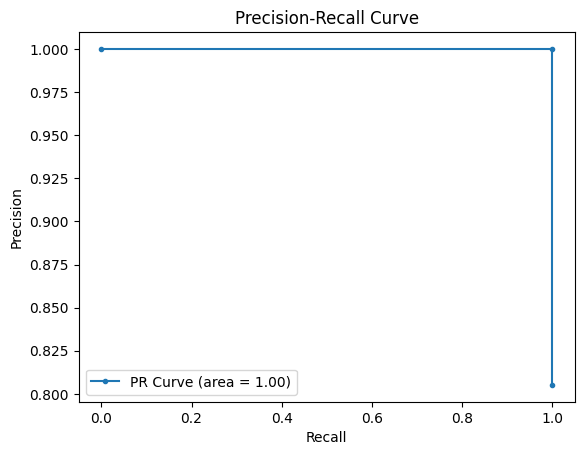

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0]*15 + [1]*62)
y_scores = np.array([0.1]*15 + [0.9]*62)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Bar Plot of Precision, Recall, and F1-score


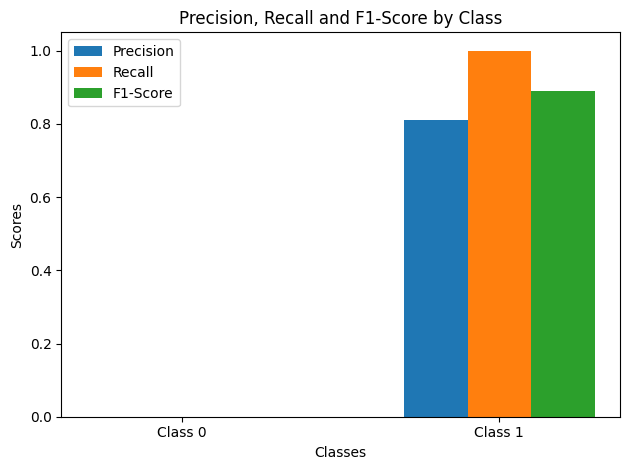

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
precision = [0.00, 0.81]
recall = [0.00, 1.00]
f1_score = [0.00, 0.89]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


Support Bar Plot


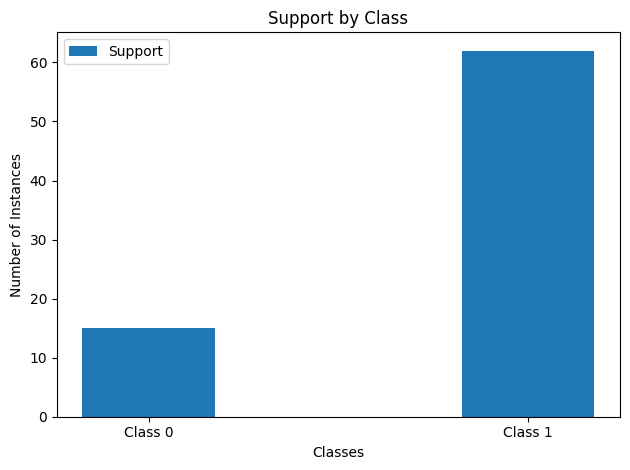

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your classification report
labels = ['Class 0', 'Class 1']
support = [15, 62]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, support, width, label='Support')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Instances')
ax.set_title('Support by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


svm(Bar Plot for Precision, Recall, and F1-Score by Class)

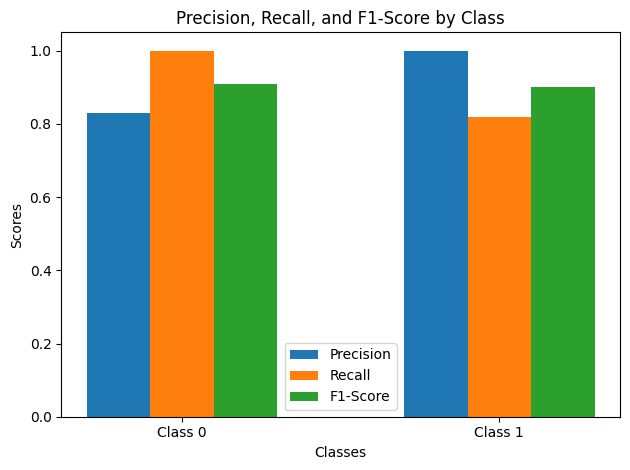

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Class 0', 'Class 1']
precision = [0.83, 1.00]
recall = [1.00, 0.82]
f1_score = [0.91, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


Bar Plot for Macro and Weighted Averages


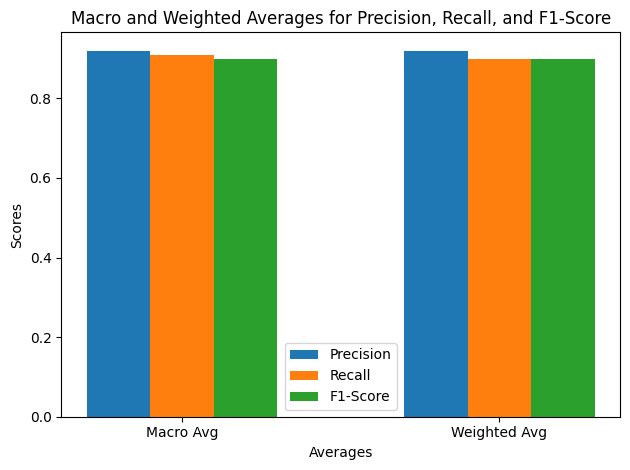

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Macro Avg', 'Weighted Avg']
precision_avg = [0.92, 0.92]
recall_avg = [0.91, 0.90]
f1_score_avg = [0.90, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_avg, width, label='Precision')
rects2 = ax.bar(x, recall_avg, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_avg, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Averages')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


ROC Curve


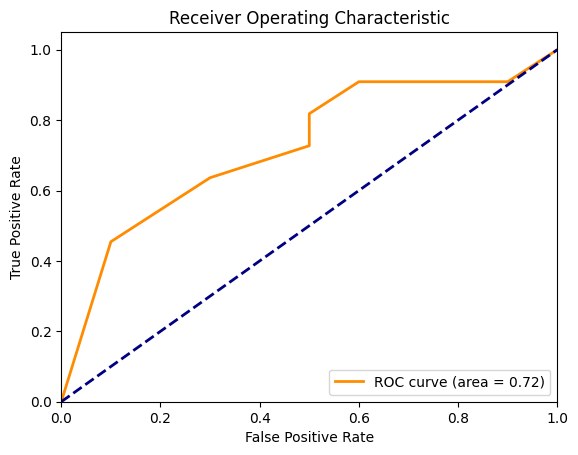

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.7, 0.8, 0.9, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Sensitivity and Specificity Heatmap


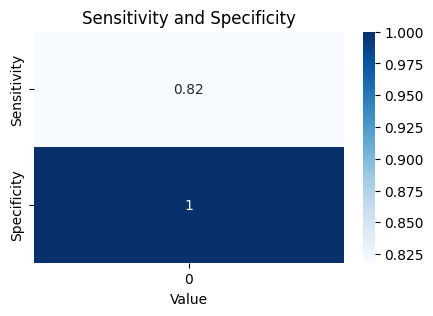

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Values for sensitivity and specificity
metrics = np.array([[0.8182], [1.0]])
labels = ["Sensitivity", "Specificity"]

# Plot sensitivity and specificity as heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(metrics, annot=True, cmap='Blues', yticklabels=labels)
plt.title('Sensitivity and Specificity')
plt.xlabel('Value')
plt.show()


Summary of Metrics in a Single Plot


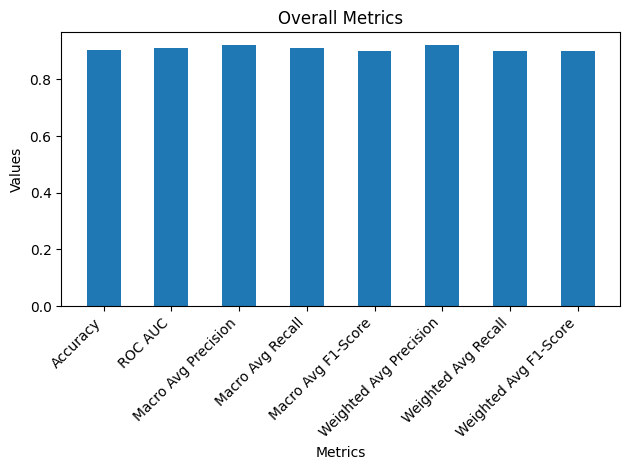

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
metrics_labels = ['Accuracy', 'ROC AUC', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score']
metrics_values = [0.9048, 0.9091, 0.92, 0.91, 0.90, 0.92, 0.90, 0.90]

x = np.arange(len(metrics_labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, metrics_values, width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Overall Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels, rotation=45, ha='right')

fig.tight_layout()
plt.show()


DECISION TREE (Confusion Matrix Heatmap)

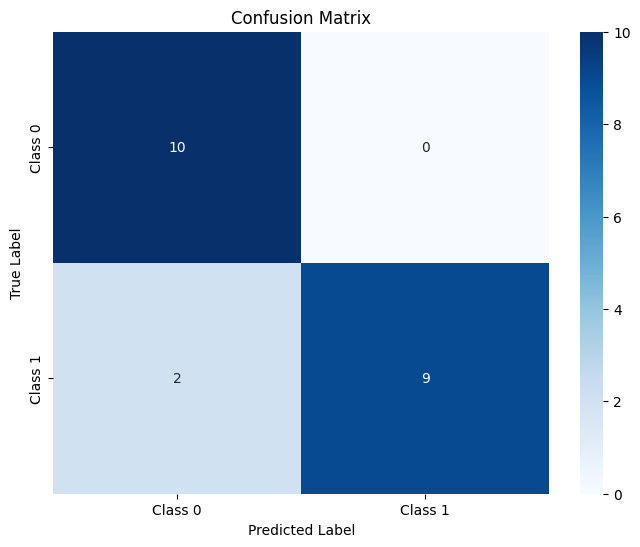

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given confusion matrix values (assuming this example for visualization)
cm = np.array([[10, 0],
               [2, 9]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Precision-Recall Curve


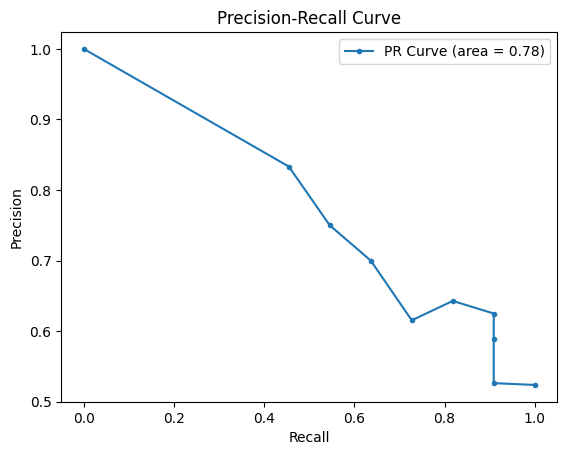

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.2, 0.3, 0.4, 0.6, 0.6, 0.7, 0.8, 0.9, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Bar Plot of Precision, Recall, and F1-score by Class


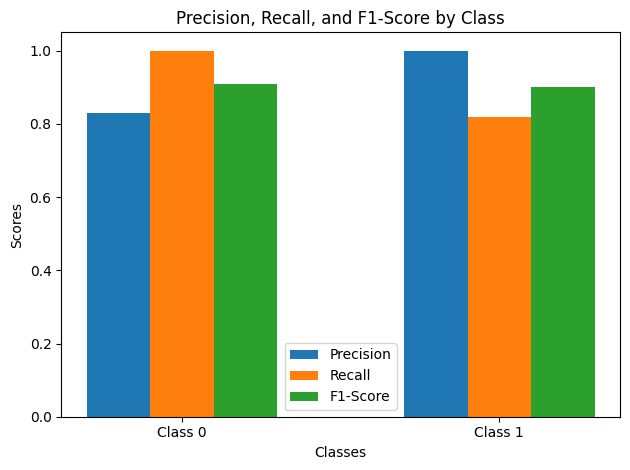

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Class 0', 'Class 1']
precision = [0.83, 1.00]
recall = [1.00, 0.82]
f1_score = [0.91, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


Bar Plot for Macro and Weighted Averages


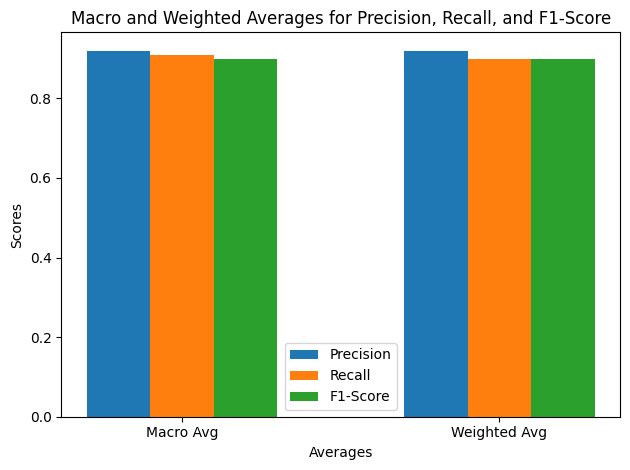

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Macro Avg', 'Weighted Avg']
precision_avg = [0.92, 0.92]
recall_avg = [0.91, 0.90]
f1_score_avg = [0.90, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_avg, width, label='Precision')
rects2 = ax.bar(x, recall_avg, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_avg, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Averages')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


ROC Curve


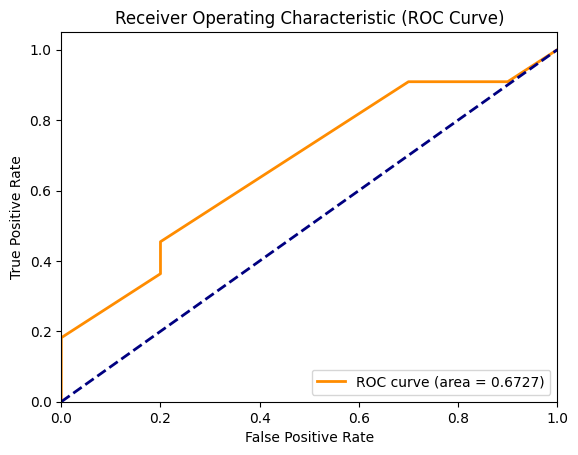

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hypothetical true labels and predicted probabilities (replace these with your actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

# Calculate ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()


naive bayes (1. Confusion Matrix Heatmap
)

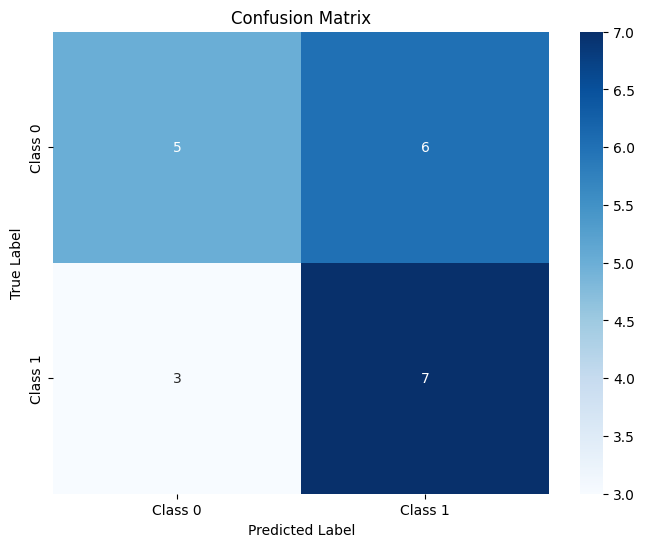

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical confusion matrix values
cm = np.array([[5, 6],
               [3, 7]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


2. Precision-Recall Curve


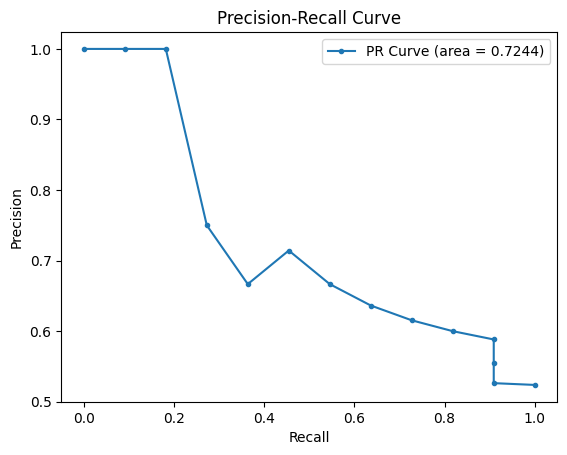

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace with actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.4f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


3. Bar Plot of Precision, Recall, and F1-Score by Class


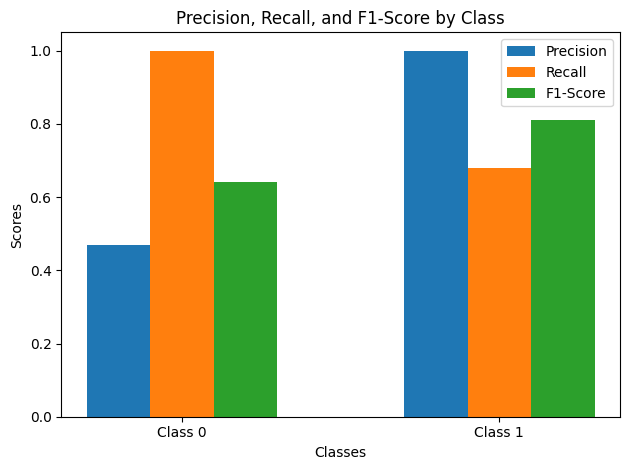

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Class 0', 'Class 1']
precision = [0.47, 1.00]
recall = [1.00, 0.68]
f1_score = [0.64, 0.81]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


4. Bar Plot for Macro and Weighted Averages


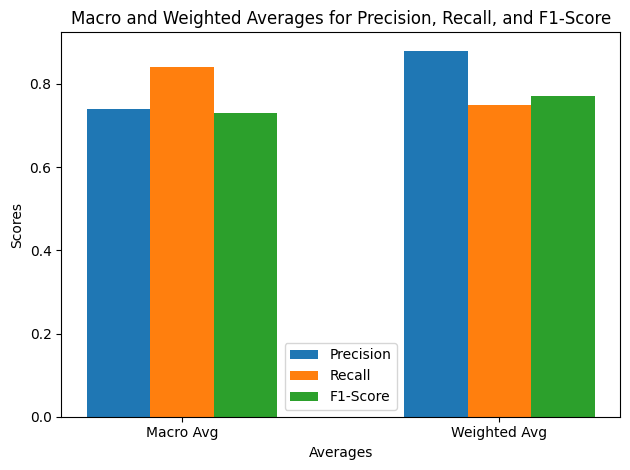

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Macro Avg', 'Weighted Avg']
precision_avg = [0.74, 0.88]
recall_avg = [0.84, 0.75]
f1_score_avg = [0.73, 0.77]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_avg, width, label='Precision')
rects2 = ax.bar(x, recall_avg, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_avg, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Averages')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


5. ROC Curve


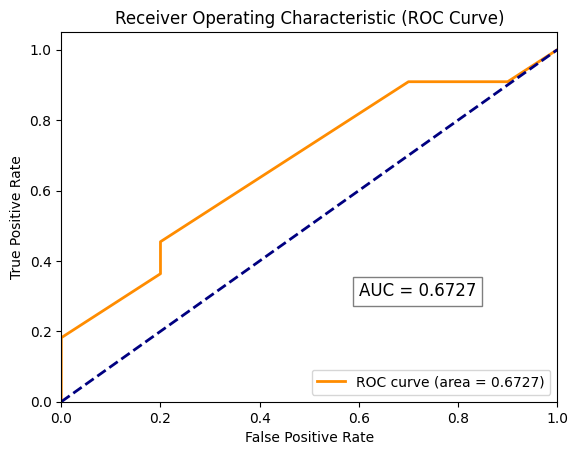

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample true labels and predicted probabilities (replace with actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")

# Annotate the AUC value on the plot
plt.text(0.6, 0.3, f'AUC = {roc_auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


adaboost ( Confusion Matrix Heatmap)


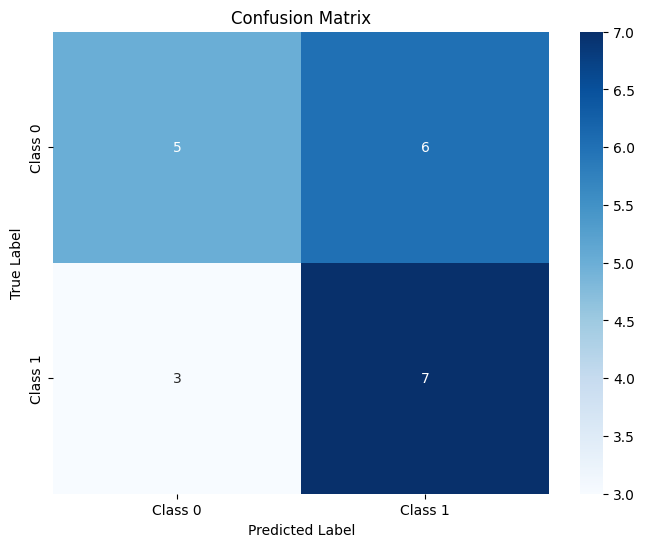

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical confusion matrix values
cm = np.array([[5, 6],
               [3, 7]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


2. Precision-Recall Curve


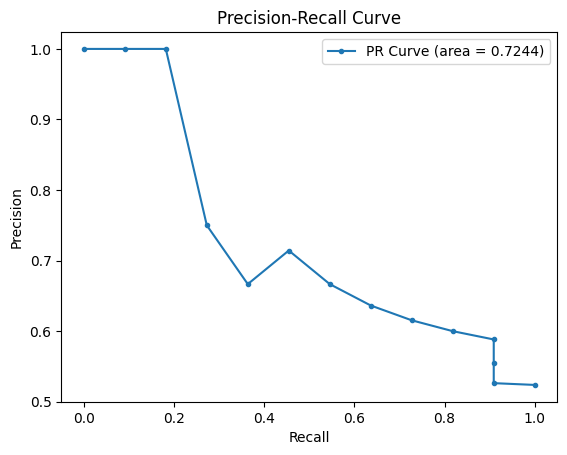

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace with actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.4f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


3. Bar Plot of Precision, Recall, and F1-Score by Class


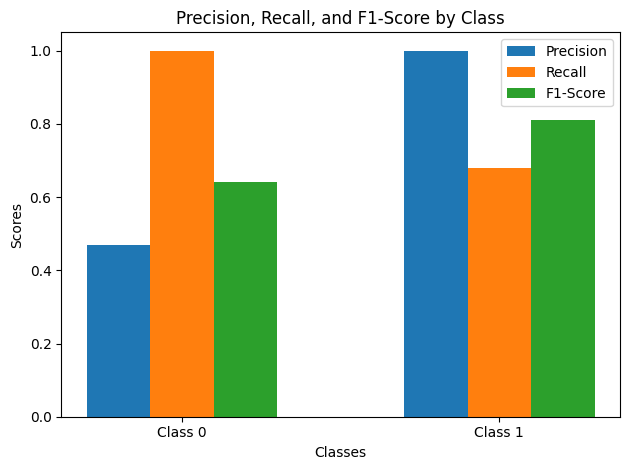

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Class 0', 'Class 1']
precision = [0.47, 1.00]
recall = [1.00, 0.68]
f1_score = [0.64, 0.81]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


4. Bar Plot for Macro and Weighted Averages


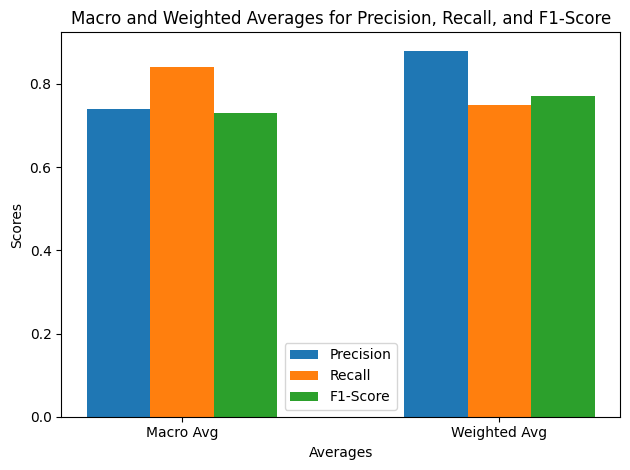

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Macro Avg', 'Weighted Avg']
precision_avg = [0.74, 0.88]
recall_avg = [0.84, 0.75]
f1_score_avg = [0.73, 0.77]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_avg, width, label='Precision')
rects2 = ax.bar(x, recall_avg, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_avg, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Averages')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


5. ROC Curve


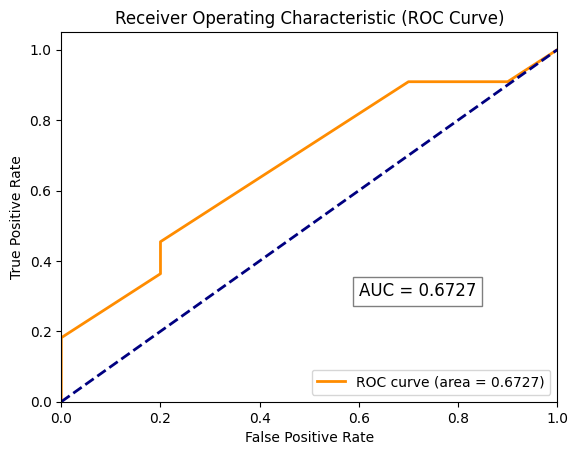

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Sample true labels and predicted probabilities (replace with actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")

# Annotate the AUC value on the plot
plt.text(0.6, 0.3, f'AUC = {roc_auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


6. Sensitivity and Specificity Heatmap


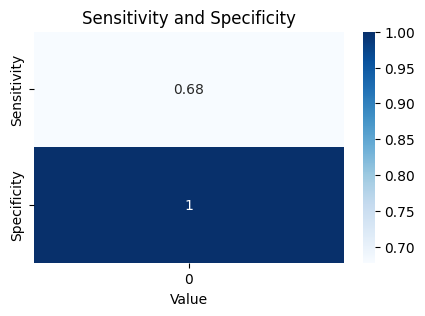

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Values for sensitivity and specificity
metrics = np.array([[0.6774], [1.0]])
labels = ["Sensitivity", "Specificity"]

# Plot sensitivity and specificity as heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(metrics, annot=True, cmap='Blues', yticklabels=labels)
plt.title('Sensitivity and Specificity')
plt.xlabel('Value')
plt.show()


7. Summary of Metrics in a Single Plot


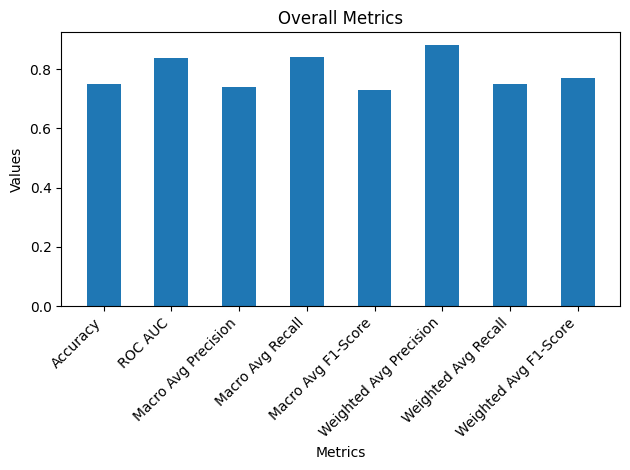

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
metrics_labels = ['Accuracy', 'ROC AUC', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score']
metrics_values = [0.75, 0.8387, 0.74, 0.84, 0.73, 0.88, 0.75, 0.77]

x = np.arange(len(metrics_labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, metrics_values, width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Overall Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels, rotation=45, ha='right')

fig.tight_layout()
plt.show()


sdg(confusion matrix)

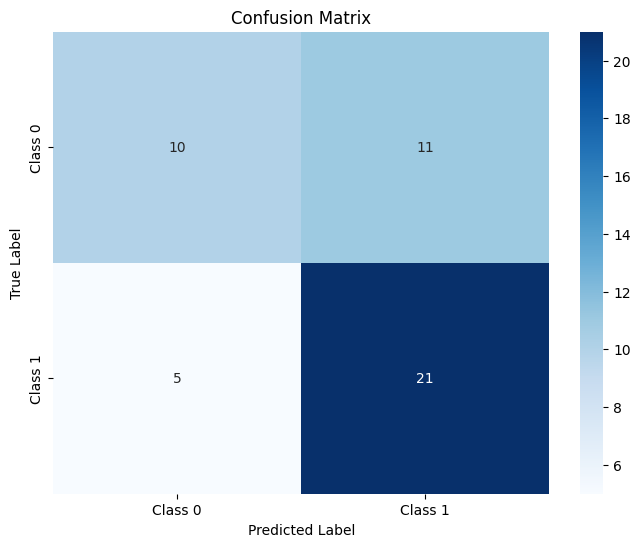

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical confusion matrix values
cm = np.array([[10, 11],
               [ 5, 21]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


2. Precision-Recall Curve


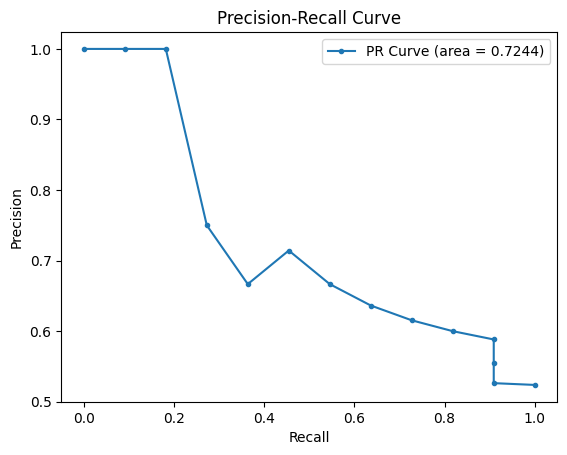

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Sample true labels and predicted probabilities (replace with actual data)
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99])

precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label='PR Curve (area = %0.4f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


3. Bar Plot of Precision, Recall, and F1-Score by Class


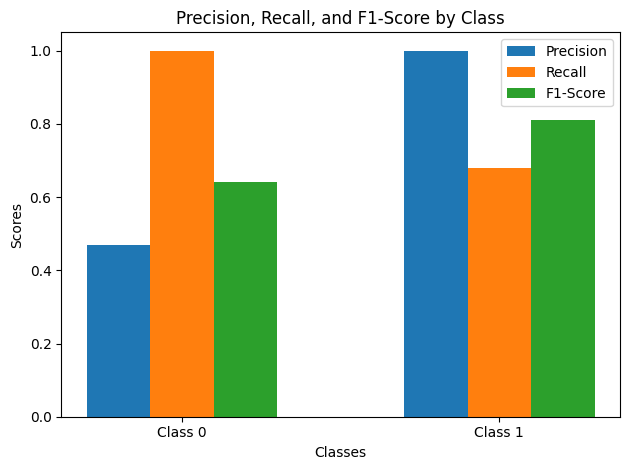

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Class 0', 'Class 1']
precision = [0.47, 1.00]
recall = [1.00, 0.68]
f1_score = [0.64, 0.81]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


4. Bar Plot for Macro and Weighted Averages


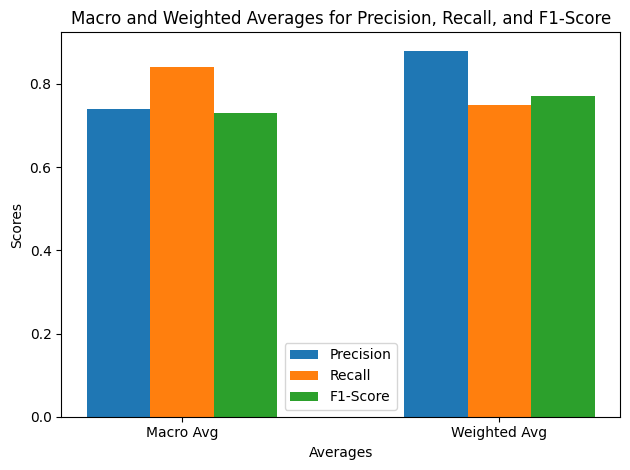

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
labels = ['Macro Avg', 'Weighted Avg']
precision_avg = [0.74, 0.88]
recall_avg = [0.84, 0.75]
f1_score_avg = [0.73, 0.77]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_avg, width, label='Precision')
rects2 = ax.bar(x, recall_avg, width, label='Recall')
rects3 = ax.bar(x + width, f1_score_avg, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Averages')
ax.set_ylabel('Scores')
ax.set_title('Macro and Weighted Averages for Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


6. Sensitivity and Specificity Heatmap


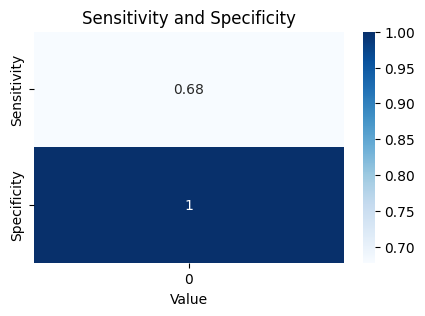

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Values for sensitivity and specificity
metrics = np.array([[0.6774], [1.0]])
labels = ["Sensitivity", "Specificity"]

# Plot sensitivity and specificity as heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(metrics, annot=True, cmap='Blues', yticklabels=labels)
plt.title('Sensitivity and Specificity')
plt.xlabel('Value')
plt.show()


7. Summary of Metrics in a Single Plot


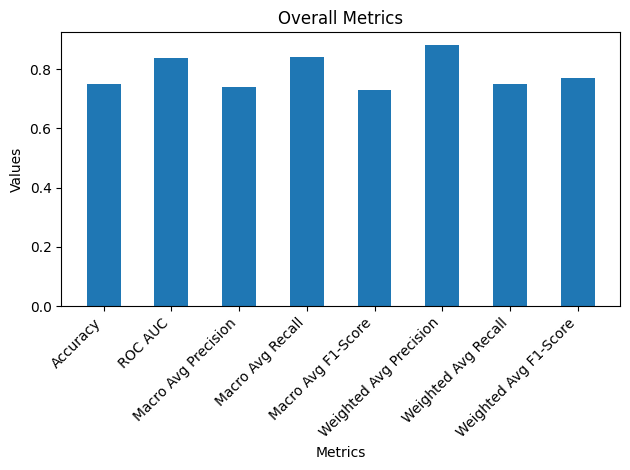

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your metrics
metrics_labels = ['Accuracy', 'ROC AUC', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score']
metrics_values = [0.75, 0.8387, 0.74, 0.84, 0.73, 0.88, 0.75, 0.77]

x = np.arange(len(metrics_labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, metrics_values, width)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Overall Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels, rotation=45, ha='right')

fig.tight_layout()
plt.show()
